In [1]:
# print the version of ALL the libraries I will be using in this study
import os
import json

notebook_path = os.path.abspath("./research.ipynb")
with open(notebook_path, 'r') as f:
    notebook_content = json.loads(f.read())

imports = set()
# we can ignore this code block, which is the first element
for i in list(notebook_content.values())[0][1:]:
    if i["cell_type"] == "code":
        for line in i["source"]:
            if "import" in line and not line.startswith("#"):
                imports.add(line.strip())

imports

{'from collections.abc import Iterable',
 'from convokit import Corpus, download',
 'from gensim.models import Word2Vec',
 'from scipy.stats import iqr',
 'from sklearn.decomposition import PCA',
 'from tqdm import tqdm',
 'import fasttext',
 'import kagglehub',
 'import matplotlib.pyplot as plt',
 'import numpy as np',
 'import os.path',
 'import pandas as pd',
 'import shutil'}

<!-- FIRST TITLE -->
<!-- # Preservation of Semantics Through Various Text Vectorization Methods on a Movie Dialouge Corpus: A Statistical Comparison -->

<!-- SECOND TITLE -->
<!-- # Output Of Different Semantic Text Vectorization Methods: A Statistical Comparison -->

<!-- THIRD TITLE -->
<!-- # Principle Component Analysis on The Output of Different Semantic Text Vectorization Methods: A Statistical Study -->

<!-- FIRST CHATGPT TITLE -->
# Quantifying Information Retention in Matrix Reconstruction: A Comparative Analysis of Semantic Vectorization Methods Using PCA
TODO: this block is essentially the title page of the study paper, hence I need to add stuf here that is usually found on the title page of a study paper

## Abstract
TODO: add an abstract

## Goal
The goal of this research is to evaluate and compare the effectiveness of different semantic vectorization methods in retaining information during matrix reconstruction, by analyzing the number of Principal Component Analysis (PCA) components required to preserve at least 80% of the original information across various vectorization approaches.

The semantic vectorization methods will be determined later in this document and will be treated as black boxes for the purpose of this study. The focus will be on the effectiveness of these methods in retaining information during matrix reconstruction, rather than the specifics of the vectorization techniques themselves.

![The flow of the experiment](./data_flow.png)

## Type of study
This study uses statistical methods to compare the outcomes of different text vectorization methods, focusing on the statistical comparison of matrices. Additionally, it incorporates hypothesis testing on the corpus to validate underlying assumptions.

<!-- FEEDBACK FROM TEACHER: be wary of the fact that you dont change your hypothesis midway trough your study based on findings -->
## Hypotheses

The following hypotheses are tested in this research:
<!-- 1. All the different text vectorization methods will produce a sparse matrix as output. -->
<!-- QUESTION FOR TEACHER: this isnt really a statistical question is it? depending on how a sparse matrix is defined and how you detirmine this, this either is or isnt a question of statistics -->
<!-- FEEDBACK: do you need to see this as a sparse matrix, or can you just view it as a matrix -->

<!-- 1. The resulting matrixes from different text vectorization methods are statistically different. -->
<!-- QUESTION FOR TEACHER: this seems like a proper null hypotheses I can test using statistical methods, like comparing disrtibutions on a corpus entry level -->
<!-- FEEDBACK: its a bit to vague, lets brainstorm some ideas for a hypotheses together -->

<!-- Brainstorm for hypotheses:
Hoeveel informatie zit er in de matrix? In andere woorden:
- Ik heb 100 cooficienten (losse vector waardes), hoeveel cooficienten heb ik nodig om de matrix terug te construeren zonder informatie te verliezen?
    - Voor iedere vectorizatie methode, hoeveel PCA componenten heb ik nodig om minimaal 80% van de informatie te behouden?
    - Welke van de vectorisatie methodes heeft het minsten componenten nodig?
- Is de ene matrix meer sparser dan de ander?
-->

<!-- TODO: put the stuf bellow in a more formal hypotheses (incorperate the use of principal component analysis as reduction method and 'explained mean variance' for matrix reconstruction method) -->

<!-- 1. The length of documents in my corpus follow a pareto distribution -->
<!-- HYPOTHESES 1 is used to show learning outcome mastery. Putting it into other words: 20% of the sentences contain 80% of the total grammatical content -->
<!-- 2. Does Zyphs law hold true for my corpus -->
<!-- HYPOTHESES 2 is somewhat similair to 1 (both are essentially the 80/20 rule), but zyphs states that 80% of the grammatical content is represented by 20% of the set of words -->
<!-- 3. How much information is in the matrix? In other words:
    - I have 100 cooficients (single vector values), how many cooficients do I need to construct the matrix back without losing information?
    - For each vectorization method, how many PCA components do I need to retain at least 80% of the information?
    - Which of the vectorization methods needs the fewest components? -->
<!-- HYPOTHESES 3 is their for when I have time to spare -->

<!-- 
Hypohteses bellow is an old one but is not really an interesting hypotheses, its simply a sanity check to do as intermediate steps
- Is one matrix more sparser than the other? 
-->

<!--
Feedback Mark op research status:
- test of corpus pareto distributie is (aldus de len(utter) distributie)
- als ik een distributie heb (hypothese is dat dit pareto distributie is, null variant is dit is niet ...), hoe test ik dit?
	Dit is eigenlijk niet meer dan de formule opzoeken voor het checken van pareto distributie en toepassen
	Om dit in hypothese te verwoorden:
	- wat is mijn verwachte distributie
	- wat is mijn reeele distributie
	- gebruik deze om de P waarde te berekenen (P waarde dat dit wel/geen pareto is)
- Antwoord op vraag op of je zelf preprocessing moet doen of dat je dit mag aanschouwen als onderdeel van de black box: aanschouw preprocessing als onderdeel van de blackbox
- spelling correctie toepassen (discriptive = descriptive)

---
Samengevat:
Voor leeruitkomste: pareto distributie hypothese test uitvoeren op corpus
Voor de leuk: de rest (aldus volledig experiment, inclusief PCA en explained mean variance)
-->

| ID | Description                                                                                      | Type              |
|----|--------------------------------------------------------------------------------------------------|-------------------|
| 1  | The lengths of the documents in the movie utterance corpus do not follow a pareto distribution   | Null hypotheses   |
| 2  | Zyphs law does not hold true for the movie utterance corpus                                      | Null hypotheses   |
| 3  | ...                                                                                              | ...               |

Each hypothesis will be tested in its own chapter later in this document.

## Text vectorization methods

In this study, we will be using the following text vectorization methods:- 
- Word2Vec: A neural network-based method that learns word embeddings by predicting neighboring words.
- CBOW (Continuous Bag of Words): A variant of Word2Vec that predicts a word based on its context.
- GloVe: A matrix factorization-based model that learns word vectors by capturing global word co-occurrence statistics.
- FastText (Skip-gram): An extension of Word2Vec that also considers subword information to generate word embeddings.

### Implementation providers

We will use the following implementation providers for the text vectorization methods:
```bash
# Install Gensim for Word2Vec and CBOW
pip install gensim

# GloVe pretrained vectors provided by Kaggle
# (Include link to dataset in final document)

# Install FastText
pip install fasttext-wheel
```

### Notes on preprocessing

Minimal to no preprocessing will be done on the movie dialogue corpus, as the focus of this study is on the effectiveness of the vectorization methods in retaining information during matrix reconstruction. Preprocessing steps such as tokenization, stop-word removal, and stemming will be considered part of the black box of the vectorization methods.

## Data gathering

For my corpus I will be using a [dataset consisting of conversational movie dialouge](https://convokit.cornell.edu/documentation/movie.html).
My choice for this dataset is mostly cause of convenience sakes.

In [2]:
import os.path

study_data_dir = os.path.abspath("./data") # We use absolute path to avoid any potential path issues

# Create data folder if it does not exist
if not os.path.exists(study_data_dir):
    print("Creating data folder")
    os.makedirs(study_data_dir)
else:
    print("Data folder already exists")

Data folder already exists


In [3]:
from convokit import Corpus, download

corpus_name = "movie-corpus"
corpus_fpath = study_data_dir + os.path.sep + corpus_name + ".zip"

# Download the corpus if it doesn't exist
if not os.path.exists(corpus_fpath):
    print("Downloading corpus...")
    corpus = Corpus(filename=download(corpus_name, data_dir=study_data_dir))
else:
    print("Corpus already downloaded.")
    corpus_dir = study_data_dir + os.path.sep + corpus_name + os.path.sep
    corpus = Corpus(filename=corpus_dir) 
    # the file parameter can be quite confusing, as it actually expects the unziped corpus as a directory

print("Corpus is loaded!")

Corpus already downloaded.
Corpus is loaded!


In [4]:
corpus.print_summary_stats()
# Number of Speakers: 9035
# Number of Utterances: 304713
# Number of Conversations: 83097

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


We will be using the `corpus.iter_utterances()` method to generate a list of strings, which will be used as the input for the different text vectorization methods.

In [5]:
import pandas as pd

corpus_df = pd.DataFrame(
    data={
        "utterances": [str(utt.text) for utt in corpus.iter_utterances()],
        "utter_lens": [len(utt.text) for utt in corpus.iter_utterances()]
    }
)
corpus_df

,utterances,utter_lens
0,They do not!,12
1,They do to!,11
2,I hope so.,10
3,She okay?,9
4,Let's go.,9
...,...,...
304708,Lord Chelmsford seems to want me to stay back ...,62
304709,I'm to take the Sikali with the main column to...,56
304710,"Your orders, Mr Vereker?",24
304711,"Good ones, yes, Mr Vereker. Gentlemen who can ...",60


### Descriptive Statistics

In this section, we will explore the corpus using descriptive statistics to gain a better understanding of the data. Additionally, we will visualize the distribution of document lengths using a histogram to provide insights into their variability and potential outliers.

In [6]:
print(f"Their are {corpus_df.shape[0]} utterances in the corpus")
# expected to be the same as in the `corpus.print_summary_stats()` output, i.e. 304713

Their are 304713 utterances in the corpus


In [7]:
# Filter out empty & only whitespace utterances
n_utterances_before = corpus_df.shape[0]
corpus_df = corpus_df[corpus_df['utterances'].str.strip() != ""].reset_index(drop=True)
n_utterances_after = corpus_df.shape[0]

print(f"Filtered out {n_utterances_before - n_utterances_after} empty utterances")

Filtered out 267 empty utterances


In [8]:
# Filter out any utterances that ONLY consist of special characters
n_utterances_before = corpus_df.shape[0]
corpus_df = corpus_df[corpus_df['utterances'].str.replace(r'[^a-zA-Z0-9]', '').str.strip() != ""].reset_index(drop=True)
n_utterances_after = corpus_df.shape[0]

print(f"Filtered out {n_utterances_before - n_utterances_after} utterances that only consist of special characters")

Filtered out 0 utterances that only consist of special characters


In [9]:
corpus_df["utter_lens"].describe()

count    304446.000000
mean         55.308002
std          64.073898
min           1.000000
25%          19.000000
50%          35.000000
75%          69.000000
max        3046.000000
Name: utter_lens, dtype: float64

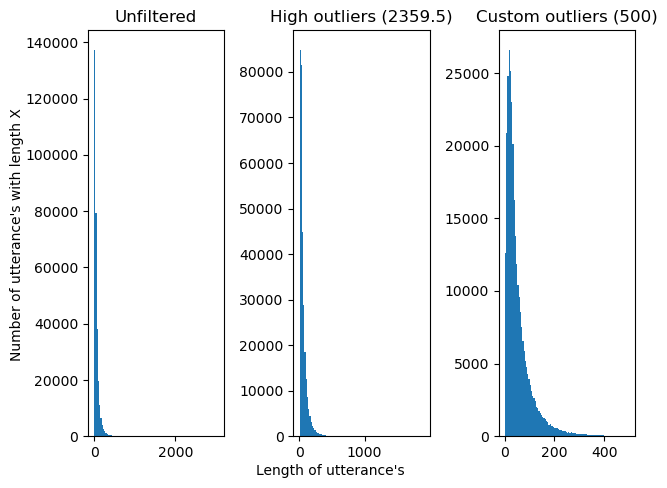

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import iqr

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
bins = 100

# ax1 is the complete plot, including outliers
ax1.hist(corpus_df["utter_lens"].values, bins=bins)
ax1.title.set_text("Unfiltered")

# ax2 plots data, filtering high outliers

Q3 = max(corpus_df["utter_lens"].values) * 0.75
IQR = iqr(corpus_df["utter_lens"].values)
high_outliers = Q3 + 1.5 * IQR
ax2.hist(list(filter(lambda x : x < high_outliers, corpus_df["utter_lens"].values)), bins=bins)
ax2.title.set_text(f"High outliers ({high_outliers})")

# After calulating the high outliers, given how far the distribution is right-skewed, I chose an even lower value just for visualization purposes
custom_outliers = 500
ax3.hist(list(filter(lambda x : x < custom_outliers, corpus_df["utter_lens"].values)), bins=bins)
ax3.title.set_text(f"Custom outliers ({custom_outliers})")

fig.text(0, 0.5, "Number of utterance's with length X", va="center", rotation="vertical")
fig.text(0.5, 0, "Length of utterance's", ha="center")
plt.tight_layout()
plt.show()

SEE COMMENT
<!-- TODO: write a short describtion stating that hypotheses 1 will be tested at this point, using appropriate methods
TODO: see chatgpt thread for 

- als ik een distributie heb (hypothese is dat dit pareto distributie is, null variant is dit is niet ...), hoe test ik dit?
	Dit is eigenlijk niet meer dan de formule opzoeken voor het checken van pareto distributie en toepassen
	Om dit in hypothese te verwoorden:
	- wat is mijn verwachte distributie
	- wat is mijn reeele distributie
	- gebruik deze om de P waarde te berekenen (P waarde dat dit wel/geen pareto is) -->

## Hypotises 1: Pareto Distribution

| **ID** | **Hypothesis**                                                  | **Type**               |
|--------|-----------------------------------------------------------------|------------------------|
| H₀     | The lengths of the entries do not follow a Pareto distribution. | Null Hypothesis        |
| H₁     | The lengths of the entries follow a Pareto distribution.        | Alternative Hypothesis |

This table organizes your hypotheses with unique IDs, the hypothesis text, and their type (null hypothesis).

### Testing the Null Hypothesis

To test whether the lengths of the entries in the corpus follow a Pareto distribution, we take the following steps:

1. **Fit a Pareto Distribution:**
    - Using Maximum Likelihood Estimation (MLE), we fit a Pareto distribution to the data, estimating its shape parameter (α) and scale parameter (xₘ).
    - The Pareto distribution’s probability density function (PDF) is given by:
      $$f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}} \quad \text{for} \quad x \geq x_m$$
      where `α` is the shape parameter, and `xₘ` is the minimum possible value (scale).

2. **Goodness-of-Fit Tests:**
   - To evaluate the fit of the Pareto distribution to the data, we apply the following goodness-of-fit tests:
     - **Kolmogorov-Smirnov (K-S) Test:** This non-parametric test compares the empirical cumulative distribution function (CDF) of the data with the CDF of the fitted Pareto distribution.
     - **Anderson-Darling Test:** A more sensitive test that emphasizes differences in the tails of the distribution, where deviations from the Pareto distribution may be more prominent.
     - **Chi-Square Goodness-of-Fit Test:** This test compares observed frequencies in different bins (based on the entry lengths) with expected frequencies under the Pareto distribution.

3. **Compute p-Values:**
   - For each test, we calculate the p-value. This tells us the probability of observing data as extreme as ours, assuming the null hypothesis is true.
   - If the p-value is less than a significance level of 0.05, we reject the null hypothesis, concluding that the data does not follow a Pareto distribution.

4. **Visualization:**
   - We plot the observed distribution of the corpus entry lengths as a histogram, overlaid with the PDF of the fitted Pareto distribution.
   - Additionally, we create a Q-Q plot to visualize how closely the quantiles of the observed data match the quantiles of a theoretical Pareto distribution.

5. **Conclusion:**
   - Based on the p-values and visualizations, we either reject or fail to reject the null hypothesis, providing insights into whether the lengths of the corpus entries align with a Pareto distribution.

In [11]:
# Use MLE to estimate the parameters of the distribution

# TODO: apply MLE on the `corpus_df['utterances']`

## Hypotises 2: Zyphs Law
...

## Hypotises 3: PCA Components
...

### Instantiate Vectorization Methods & Experiment Generalization

The generalization includes creating a base class that will be used to interface with the text vectorization methods. This class will be extended for each of the text vectorization methods mentioned before. This is purly for orginization purposes and to make the code more readable.

#### Base class for text vectorization methods

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from collections.abc import Iterable

class TextVectorizationMethod:
    def __init__(self, method: str = "unset"):
        self.method = method
        self.model = None
        self.reducer: PCA = PCA()
        

    def fit(self, corpus: Iterable[str]) -> None:
        """
        Fits the vectorizer to the given corpus.

        ## Params:
            `corpus: Iterable[str]` A list of documents to fit the vectorizer on.

        ## Returns:
            `None`
        """
        raise NotImplementedError

    def transform(self) -> np.ndarray:
        """
        Generates a matrix for the fitted corpus, using the concrete vectorization implementation (see `method` or `vectorizor` properties).

        ## Params:
            ...

        ## Returns:
            `np.ndarray` The vectorized fitted corpus.
        """
        if self.model is None:
            raise ValueError("Model has not been fitted. Call `.fit()` first.")
    
    def reduce(self, matrix: np.ndarray, c: int | None =None) -> np.ndarray:
        """
        Reduce the matrix using principal component analysis.

        ## Params:
            `matrix: np.ndarray` The matrix to recude.
            `c: int | None` The number of components to use. If none, `c = min(n_samples, n_features)`

        ## Returns:
            `np.ndarray` The reduced matrix
        """
        if c:
            self.reducer = PCA(n_components=c)

        return self.reducer.fit_transform(matrix)
    
    def longest_vector_len(self) -> int:
        """
        Returns the length of the longest vector in the model's vocabulair.

        ## Returns:
           `int` The length of the longest vector in the model's vocabulair.
        """
        raise NotImplementedError

#### Word2Vec

In [13]:
from gensim.models import Word2Vec

class Word2VecVectorization(TextVectorizationMethod):
    def __init__(self):
        super().__init__(method='word2vec')

    def fit(self, corpus: list[str]):
        # Train the Word2Vec model
        self.model = Word2Vec(sentences=corpus, sg=1, workers=4)

        # https://radimrehurek.com/gensim/models/word2vec.html
        # > sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.

    def transform(self):
        super().transform()
        # Generate the matrix
        return np.array([self.model.wv[word] for word in self.model.wv.index_to_key])
    
    def longest_vector_len(self):
        return max(len(self.model.wv[word]) for word in self.model.wv.index_to_key)

TODO: describe that I will first generate the matrixes using these methods and store those in seperate files, in order to make this study reproducable

#### CBOW (Continuous Bag of Words)

In [14]:
from gensim.models import Word2Vec


class CBOWVectorization(TextVectorizationMethod):
    def __init__(self):
        super().__init__(method='cbow')

    def fit(self, corpus: list[str]):
        # Train the CBOW model
        self.model = Word2Vec(
            sentences=corpus, 
            sg=0, # sg=0 means CBOW
            workers=4
        )

    def transform(self):
        super().transform()
        # Generate the matrix
        return np.array([self.model.wv[word] for word in self.model.wv.index_to_key])
    
    def longest_vector_len(self):
        return max(len(self.model.wv[word]) for word in self.model.wv.index_to_key)

#### GloVe

See [kaggle.com/datasets/danielwillgeorge/glove6b100dtxt](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt) for the pretrained glove model used.

In [15]:
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("danielwillgeorge/glove6b100dtxt")
glove_fname = "glove.6B.100d.txt"
glove_fsrc = os.path.join(path, glove_fname)

# Copy the file to the data folder
glove_ftarget = os.path.join(study_data_dir, glove_fname)
if not os.path.exists(glove_ftarget):
    shutil.copy(glove_fsrc, glove_ftarget)

In [16]:
import numpy as np


class GloVeVectorization(TextVectorizationMethod):
    def __init__(self, glove_path: str | None = None):
        super().__init__(method='glove')
        if not glove_path:
            glove_path = os.path.join(study_data_dir, 'glove.6B.100d.txt')
        self.glove_path = glove_path
        self.word_vectors = {}

    def fit(self, corpus: Iterable[str]):
        # Load pre-trained GloVe vectors
        with open(self.glove_path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                vector = np.array(values[1:], dtype='float32')
                self.word_vectors[word] = vector
        self.model = self.word_vectors  # Model is now the loaded vectors

    def transform(self) -> np.ndarray:
        super().transform()  # Check if model is fitted
        matrix = []
        
        for word in self.model:
            matrix.append(self.model[word])

        return np.array(matrix)

    def longest_vector_len(self) -> int:
        """
        Finds the length of the longest vector in the GloVe model.
        
        ## Returns:
            `int` The length of the longest vector.
        """
        return max(len(vector) for vector in self.word_vectors.values())

#### FastText (skip-gram) 

In [17]:
# See: https://pypi.org/project/fasttext-wheel/#usage-overview
import fasttext


class FastTextVectorization(TextVectorizationMethod):
    def __init__(self):
        super().__init__(method='fasttext')
        self.model = None

    def fit(self, corpus: list[str]):
        # FastText implementation expects a txt file instead of a list of strings
        _ = os.path.join(study_data_dir, 'corpus.txt')
        corpus = [ x.replace('\n', '') for x in corpus ] # We need to remove newlines from the corpus
        with open(os.path.join(study_data_dir, 'corpus.txt'), 'w') as corpus_f:
            corpus_f.write('\n'.join(corpus))
        
        # Train the FastText model
        self.model = fasttext.train_unsupervised(_, model='skipgram')

    def transform(self):
        super().transform()
        # Generate the matrix
        return np.array([self.model.get_word_vector(word) for word in self.model.get_words()])
    
    def longest_vector_len(self):
        return max(len(self.model.get_word_vector(word)) for word in self.model.get_words())

### Experiment

In [18]:
vectorizers: list[TextVectorizationMethod] = [
    Word2VecVectorization(),
    CBOWVectorization(),
    GloVeVectorization(),
    FastTextVectorization()
]

In [19]:
from tqdm import tqdm

# Initialize tqdm with a dynamic description
pbar = tqdm(vectorizers, desc="Starting vectorizer fitting")

# Fit each vectorizer and update the description dynamically
for model in pbar:
    pbar.set_description(f"Fitting corpus to {model.method}")
    model.fit(corpus_df['utterances'].values)

Fitting corpus to fasttext: 100%|██████████| 4/4 [00:41<00:00, 10.46s/it]


In [20]:
pbar = tqdm(total=len(vectorizers))

for model in vectorizers:
    pbar.set_description(f"Transforming corpus using {model.method}")
    matrix = model.transform()

    print("=== Sanity checks ===")
    print(f"Number of non-zero elements in the matrix: {np.count_nonzero(matrix)}")

    initial_value_for_c = min(matrix.shape)
    values_for_c = [ i for i in range(initial_value_for_c, 0, -1) ]
    for c in values_for_c:
        reduced_matrix = model.reduce(matrix, c)

Transforming corpus using word2vec:   0%|          | 0/4 [00:00<?, ?it/s]

=== Sanity checks ===
Number of non-zero elements in the matrix: 9100


Transforming corpus using cbow:   0%|          | 0/4 [00:00<?, ?it/s]    

=== Sanity checks ===
Number of non-zero elements in the matrix: 9100


Transforming corpus using glove:   0%|          | 0/4 [00:00<?, ?it/s]

=== Sanity checks ===
Number of non-zero elements in the matrix: 40000000


Transforming corpus using fasttext:   0%|          | 0/4 [00:15<?, ?it/s]

=== Sanity checks ===
Number of non-zero elements in the matrix: 2940500


## Sources

Inspiration for vectorization methods:
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

Explanation of cumulative explained variance:
https://en.wikipedia.org/wiki/Explained_variation

Statistical hypothesis testing:
https://en.wikipedia.org/wiki/Statistical_hypothesis_test

Perplexity thread used:
https://www.perplexity.ai/collections/staistical-analysis-of-semanti-kIxRGTaZQYqP4ZwkAvJLtQ

```BibTex
@InProceedings{Danescu-Niculescu-Mizil+Lee:11a,
    author={Cristian Danescu-Niculescu-Mizil and Lillian Lee},
    title={Chameleons in imagined conversations:
        A new approach to understanding coordination of linguistic style in dialogs.},
    booktitle={Proceedings of the, Workshop on Cognitive Modeling and Computational Linguistics, ACL 2011},
    year={2011},
    url={https://www.cs.cornell.edu/~cristian/Chameleons_in_imagined_conversations.html}
}
```